# Final Project Report

* Class: DS 5100
* Student Name: Mahin Ganesan
* Student Net ID: mg4ccz
* This URL: https://github.com/mahgan/mg4ccz_ds5100_montecarlo/blob/main/FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/mahgan/mg4ccz_ds5100_montecarlo/

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [54]:
'''
# Name:  Mahin Ganesan
# Net UD: mg4ccz

import pandas as pd
import numpy as np

class Die():
    """
    A class that creates a "Die" object, or any variable with n results and weights 
    for each result that can a numeric or character value. The object can be fair, with 
    equal weights, or unfair, with unequal weights and the object can be "rolled" many times.
    """
    def __init__(self,faces):
        """
        Initializes the class, taking an array of faces as a parameter, 
        raises an error if input is not an array or if there are 
        duplicate values in the array. Initializes weights to be 1.0 
        and saves weights and faces in a data frame.
        """
        if not isinstance(faces,np.ndarray):
            raise TypeError("Input is not a numpy array.")
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Duplicate values in array.")
        self.faces = faces
        self.weights = np.ones_like(faces,dtype=float)
        self.die_df = pd.DataFrame(self.weights,index=self.faces)

    def change_weight(self,face,weight):
        """
        Changes the weight of a single face based on an inputted face and weight value.
        Raises an error if the value is not a face in the array or if value is not numeric.
        """
        if face not in self.faces:
            raise IndexError("Face value not found.")
        if not isinstance(weight, (int, float)):
            raise TypeError("Input is not an numeric value.")
        self.die_df.loc[face,0] = weight
    def roll(self,nrolls=1):
        """
        Rolls the die object, default is one roll. Returns a list of the 
        outcomes of the roll.
        """
        probs = self.weights/sum(self.weights)
        outcomes = np.random.choice(self.faces,nrolls,p=probs)
        return outcomes
    def show_state(self):
        """
        Returns a copy of the die data frame with faces and weights for each face.
        """
        return self.die_df.copy()


class Game():
        """
        Creates the Game class, which takes in one or more dice and rolls the dice
        based on the form of the Game (number of rolls) using the play function.
        """
        def __init__(self,dice):
            """
            Takes in one parameter, a list of dice and creates a private
            data frame to store the results of playing a Game.
            """
            self.dice = dice
            self.play_result_wide_df = pd.DataFrame()
        def play(self,rolls):
            """
            Rolls the dice a given number of times and saves the result in 
            a data frame.
            """
            roll_df = {}
            for i,die in enumerate(self.dice):
                roll_df[i] = die.roll(rolls)
            self.play_result_wide_df = pd.DataFrame(roll_df)
        def play_results(self,form = 'wide'):
            """
            Shows the results of the play method in either a wide or narrow form
            and raises an error if the input provided is not either of these two.
            """
            if form != 'wide' and form != 'narrow':
                raise ValueError("Invalid Option, must use between forms narrow and wide.")
            elif form == 'wide':
                return self.play_result_wide_df.copy()
            else:
                narrow_play_result_df = pd.DataFrame(self.play_result_wide_df.unstack().reset_index())
                narrow_play_result_df.columns = ['Die Number', 'Roll Number', 'Outcomes']
                narrow_play_result_df = narrow_play_result_df[['Roll Number','Die Number','Outcomes']]
                return narrow_play_result_df
            

class Analyzer():
        """
        Uses the results of a game to conduct different analyses on the game's results.
        """
        def __init__(self,game):
            """
            Takes a Game as an input and throws an error if the object provided is not 
            a Game object. Gets the results of the game.
            """
            if not isinstance(game, Game):
                raise ValueError("Value provided is not a Game object.")
            self.game = game
            self.game_results = game.play_results()
        def jackpot(self):
            """
            Calculates the number of times a roll had all the same faces and
            returns this number as an integer.
            """
            jackpotct = 0
            for r in range(len(self.game_results)):
                roll = self.game_results.iloc[r]
                isJackpot = True
                lastDie = roll.iloc[0]
                for i in range(len(roll)):
                    die = roll.iloc[i]
                    if die != lastDie:
                        isJackpot = False
                        break
                    lastDie = die
                if isJackpot:
                    jackpotct += 1 
            return jackpotct   
        
        def face_cts_per_roll(self):
            """
            Returns a data frame with number of times each face was rolled 
            in a Game.
            """
            face_cts = []
            for val in range(len(self.game_results)):
                face_counts = self.game_results.iloc[val].value_counts()
                face_cts.append(face_counts)
            return pd.DataFrame(face_cts, index=range(1, len(self.game_results) + 1)).fillna(0).astype(int)
                              
        def combination_ct(self):
            """
            Returns a data frame of the number of occurrences of each unique set of faces rolled
            based on a Game.
            """
            countSets = {}
            for r in range(len(self.game_results)):
                roll = self.game_results.iloc[r]
                newSet = tuple()
                for i in range(len(roll)):
                    dieval = roll.iloc[i]
                    newSet += (dieval,)
                combination = tuple(sorted(list(newSet)))
                if combination in countSets:
                    countSets[combination] += 1
                else:
                    countSets[combination] = 1

            df = pd.DataFrame.from_dict(countSets, orient='index', columns=['Count'])
            df.index = pd.MultiIndex.from_tuples(df.index)

            return df
        
        def permutation_ct(self):
            """
            Returns a data frame of the number of occurrences of each unique set of faces rolled
            in the order they were rolled in based on a Game.
            """           
            countSets = {}
            for r in range(len(self.game_results)):
                roll = self.game_results.iloc[r]
                combination = tuple()
                for i in range(len(roll)):
                    dieval = roll.iloc[i]
                    combination += (dieval,)
                if combination in countSets:
                    countSets[combination] += 1
                else:
                    countSets[combination] = 1

            df = pd.DataFrame.from_dict(countSets, orient='index', columns=['Count'])
            df.index = pd.MultiIndex.from_tuples(df.index)

            return df
'''

'\n# Name:  Mahin Ganesan\n# Net UD: mg4ccz\n\nimport pandas as pd\nimport numpy as np\n\nclass Die():\n    """\n    A class that creates a "Die" object, or any variable with n results and weights \n    for each result that can a numeric or character value. The object can be fair, with \n    equal weights, or unfair, with unequal weights and the object can be "rolled" many times.\n    """\n    def __init__(self,faces):\n        """\n        Initializes the class, taking an array of faces as a parameter, \n        raises an error if input is not an array or if there are \n        duplicate values in the array. Initializes weights to be 1.0 \n        and saves weights and faces in a data frame.\n        """\n        if not isinstance(faces,np.ndarray):\n            raise TypeError("Input is not a numpy array.")\n        if len(faces) != len(np.unique(faces)):\n            raise ValueError("Duplicate values in array.")\n        self.faces = faces\n        self.weights = np.ones_like(faces

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [55]:
'''
import unittest
import pandas as pd
import numpy as np
from montecarlo import Die


class TestDie(unittest.TestCase):
    def test_init(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)
        self.assertTrue(isinstance(die1.faces,np.ndarray))
        self.assertTrue(isinstance(die1.die_df,pd.DataFrame))

    def test_change_weight(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)
        die1.change_weight(6,3)
        expected = 3
        self.assertEqual(die1.weights[5],expected)

    def test_roll(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)
        expected = 3
        self.assertEqual(len(die1.roll(3)),expected)

    def test_show_state(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)   
        df_copy = die1.show_state()
        self.assertTrue(isinstance(df_copy, pd.DataFrame))



from montecarlo import Game

class TestGame(unittest.TestCase):
    def test_init(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])
        self.assertTrue(isinstance(game1.dice, list))

    def test_play(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)  
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])   
        game1.play(6)       
        expected = 6
        self.assertTrue(isinstance(game1.play_results(), pd.DataFrame))
        self.assertEqual(len(game1.play_results()),expected) 

    def test_play_results(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)  
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])   
        game1.play(6)  
        results = game1.play_results()
        self.assertTrue(isinstance(results, pd.DataFrame))
        expected = list(range(len(game1.dice)))
        self.assertEqual(list(results.columns), expected)



from montecarlo import Analyzer

class TestAnalyzer(unittest.TestCase):
    def test_init(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)  
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])   
        game1.play(6)  
        analyzer1 = Analyzer(game1)
        self.assertTrue(isinstance(analyzer1, Analyzer))

    def test_jackpot(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)  
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])   
        game1.play(6)  
        analyzer1 = Analyzer(game1)
        jackpotct = analyzer1.jackpot()
        maxjackpotct = 6
        self.assertTrue(isinstance(jackpotct, int))
        self.assertLessEqual(jackpotct, maxjackpotct)

    def test_face_cts_per_roll(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)  
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])   
        game1.play(6)  
        analyzer1 = Analyzer(game1)
        face_cts_df = analyzer1.face_cts_per_roll()
        self.assertTrue(isinstance(face_cts_df, pd.DataFrame))

    def test_combination_ct(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)  
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])   
        game1.play(6)  
        analyzer1 = Analyzer(game1)
        combination_counts_df = analyzer1.combination_ct()
        self.assertTrue(isinstance(combination_counts_df, pd.DataFrame))
        self.assertTrue(isinstance(combination_counts_df.index, pd.MultiIndex))
    
    def test_permutation_ct(self):
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)  
        faces2 = np.array([1,2])
        die2 = Die(faces2)
        game1 = Game([die1,die2])   
        game1.play(6)  
        analyzer1 = Analyzer(game1)
        permutation_counts_df = analyzer1.permutation_ct()
        self.assertTrue(isinstance(permutation_counts_df, pd.DataFrame))
        self.assertTrue(isinstance(permutation_counts_df.index, pd.MultiIndex))





if __name__ == '__main__':
    
    unittest.main(verbosity=3)
'''

"\nimport unittest\nimport pandas as pd\nimport numpy as np\nfrom montecarlo import Die\n\n\nclass TestDie(unittest.TestCase):\n    def test_init(self):\n        faces = np.array([1,2,3,4,5,6])\n        die1 = Die(faces)\n        self.assertTrue(isinstance(die1.faces,np.ndarray))\n        self.assertTrue(isinstance(die1.die_df,pd.DataFrame))\n\n    def test_change_weight(self):\n        faces = np.array([1,2,3,4,5,6])\n        die1 = Die(faces)\n        die1.change_weight(6,3)\n        expected = 3\n        self.assertEqual(die1.weights[5],expected)\n\n    def test_roll(self):\n        faces = np.array([1,2,3,4,5,6])\n        die1 = Die(faces)\n        expected = 3\n        self.assertEqual(len(die1.roll(3)),expected)\n\n    def test_show_state(self):\n        faces = np.array([1,2,3,4,5,6])\n        die1 = Die(faces)   \n        df_copy = die1.show_state()\n        self.assertTrue(isinstance(df_copy, pd.DataFrame))\n\n\n\nfrom montecarlo import Game\n\nclass TestGame(unittest.TestCase

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [3]:
import montecarlo.montecarlo 

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
help(montecarlo.montecarlo.Die)

Help on class Die in module montecarlo.montecarlo:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  A class that creates a "Die" object, or any variable with n results and weights 
 |  for each result that can a numeric or character value. The object can be fair, with 
 |  equal weights, or unfair, with unequal weights and the object can be "rolled" many times.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Initializes the class, taking an array of faces as a parameter, 
 |      raises an error if input is not an array or if there are 
 |      duplicate values in the array. Initializes weights to be 1.0 
 |      and saves weights and faces in a data frame.
 |  
 |  change_weight(self, face, weight)
 |      Changes the weight of a single face based on an inputted face and weight value.
 |      Raises an error if the value is not a face in the array or if value is not numeric.
 |  
 |  roll(self, nrolls=1)
 |      Rolls the die object, default is one roll. Retur

In [5]:
help(montecarlo.montecarlo.Game)

Help on class Game in module montecarlo.montecarlo:

class Game(builtins.object)
 |  Game(dice)
 |  
 |  Creates the Game class, which takes in one or more dice and rolls the dice
 |  based on the form of the Game (number of rolls) using the play function.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dice)
 |      Takes in one parameter, a list of dice and creates a private
 |      data frame to store the results of playing a Game.
 |  
 |  play(self, rolls)
 |      Rolls the dice a given number of times and saves the result in 
 |      a data frame.
 |  
 |  play_results(self, form='wide')
 |      Shows the results of the play method in either a wide or narrow form
 |      and raises an error if the input provided is not either of these two.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the ob

In [6]:
help(montecarlo.montecarlo.Analyzer)

Help on class Analyzer in module montecarlo.montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |  
 |  Uses the results of a game to conduct different analyses on the game's results.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game)
 |      Takes a Game as an input and throws an error if the object provided is not 
 |      a Game object. Gets the results of the game.
 |  
 |  combination_ct(self)
 |      Returns a data frame of the number of occurrences of each unique set of faces rolled
 |      based on a Game.
 |  
 |  face_cts_per_roll(self)
 |      Returns a data frame with number of times each face was rolled 
 |      in a Game.
 |  
 |  jackpot(self)
 |      Calculates the number of times a roll had all the same faces and
 |      returns this number as an integer.
 |  
 |  permutation_ct(self)
 |      Returns a data frame of the number of occurrences of each unique set of faces rolled
 |      in the order they were rolled in based on a Game.
 |  
 |  ----

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/mahgan/mg4ccz_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

![Sample Image](pip_install_montecarlo_success.png)


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [7]:
import numpy as np
import pandas as pd
from montecarlo.montecarlo import Die
faces = np.array(['H','T'])
die1 = Die(faces)  
faces2 = np.array(['H','T'])
die2 = Die(faces2)
die2.change_weight('H', 5)


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
from montecarlo.montecarlo import Game

game1 = Game([die1,die2])
game1.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
game2 = Game([die1,die2,die2])
rolls = 1000
game2.play(rolls)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [10]:
from montecarlo.montecarlo import Analyzer

analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

jackpot1 = analyzer1.jackpot()
jackpot2 = analyzer2.jackpot()
print(jackpot1)
print(jackpot2)

498
373


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [11]:
relfreq1 = jackpot1/rolls
relfreq1

0.498

In [12]:
relfreq2 = jackpot2/rolls
relfreq2

0.373

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Jackpot Frequencies by Fair or Unfair Coin')

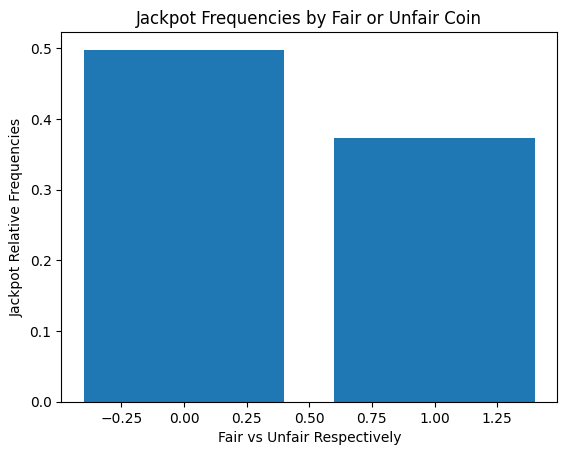

In [80]:
import matplotlib.pyplot as plt
vals = [relfreq1,relfreq2]
indexes = [0,1]
plt.bar(indexes,vals)
plt.xlabel('Fair vs Unfair Respectively')
plt.ylabel('Jackpot Relative Frequencies')
plt.title('Jackpot Frequencies by Fair or Unfair Coin')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [13]:
faces = np.array([1,2,3,4,5,6])
die1 = Die(faces)  
die2 = Die(faces)  
die3 = Die(faces)


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [14]:
die1.change_weight(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [15]:
die2.change_weight(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
gamefairdice = Game([die3,die3,die3,die3,die3])
rolls2 = 10000

gamefairdice.play(rolls2)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [17]:
gameunfairdice = Game([die1,die2,die3,die3,die3])

gameunfairdice.play(rolls2)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0.5, 1.0, 'Jackpot Frequencies by Fair or Unfair Dice 6 Sides')

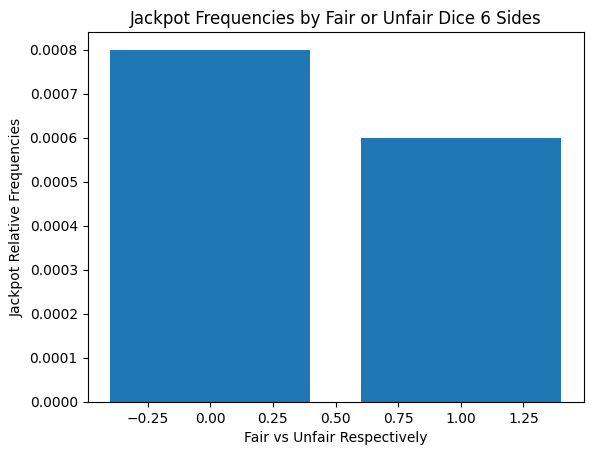

In [79]:
analyzerfair = Analyzer(gamefairdice)
analyzerunfair = Analyzer(gameunfairdice)

jackpot1 = analyzerfair.jackpot()
jackpot2 = analyzerunfair.jackpot()
reljackpot1 = jackpot1/rolls2
reljackpot2 = jackpot2/rolls2


vals = [reljackpot1,reljackpot2]
indexes = [0,1]
plt.bar(indexes,vals)
plt.xlabel('Fair vs Unfair Respectively')
plt.ylabel('Jackpot Relative Frequencies')
plt.title('Jackpot Frequencies by Fair or Unfair Dice 6 Sides')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [56]:
sum = 0
dict1 = {}
with open("english_letters.txt", 'r') as file:
    for line in file:
        #print(line.strip()) 
        [letter, num] = line.split(" ")
        dict1[letter] = int(num)


faceslet = np.array(list(dict1.keys()))

dielet = Die(faceslet)

for val in dict1:
    dielet.change_weight(val,dict1[val])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [22]:
gamelet = Game([dielet,dielet,dielet,dielet])

gamelet.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [68]:
analyzerlet = Analyzer(gamelet)
sum = 0

wordSet = set()
with open("scrabble_words.txt", 'r') as file:
    for line in file:
        wordSet.add(line.strip())

permutations = analyzerlet.permutation_ct()
for r in range(len(permutations)):
    perm_tuple = permutations.index[r]
    perm_string = ''.join(str(val) for val in perm_tuple)

    perm_count = int(permutations.iloc[r])

    if perm_string in wordSet:
        sum += perm_count

print("Number of four letter permutations that are scrabble words:", sum)


Number of four letter permutations that are scrabble words: 56


C:\Users\lebro\AppData\Local\Temp\ipykernel_2076\1122139331.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  perm_count = int(permutations.iloc[r])


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [72]:
gamelet2 = Game([dielet,dielet,dielet,dielet,dielet])

gamelet2.play(1000)

analyzerlet2 = Analyzer(gamelet2)
sum2 = 0

permutations2 = analyzerlet2.permutation_ct()
for r in range(len(permutations2)):
    perm_tuple2 = permutations2.index[r]
    perm_string2 = ''.join(str(val) for val in perm_tuple2)

    perm_count2 = int(permutations2.iloc[r])

    if perm_string2 in wordSet:
        sum2 += perm_count2

print("Number of five letter permutations that are scrabble words: ", sum2)

if sum2 < sum: 
    print("4 dice produces more words in the scrabble dictionary than 5 dice.")
elif sum2 > sum:
    print("5 dice produces more words in the scrabble dictionary than 4 dice.")
else:
    print("5 dice and 4 dice produce the same number of words in the scrabble dictionary.")


C:\Users\lebro\AppData\Local\Temp\ipykernel_2076\3880326314.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  perm_count2 = int(permutations2.iloc[r])


Number of five letter permutations that are scrabble words 5
4 dice produces more words in the scrabble dictionary than 5 dice.


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.